In [2]:
import numpy as np
import pandas as pd

# import plotnine
from plotnine import ggplot, aes, geom_line, geom_point, geom_errorbar, facet_wrap, position_dodge, theme

In [3]:
rf = pd.read_csv("results/rf_comparison_classification.csv").drop(['Unnamed: 0'], axis = 1)

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


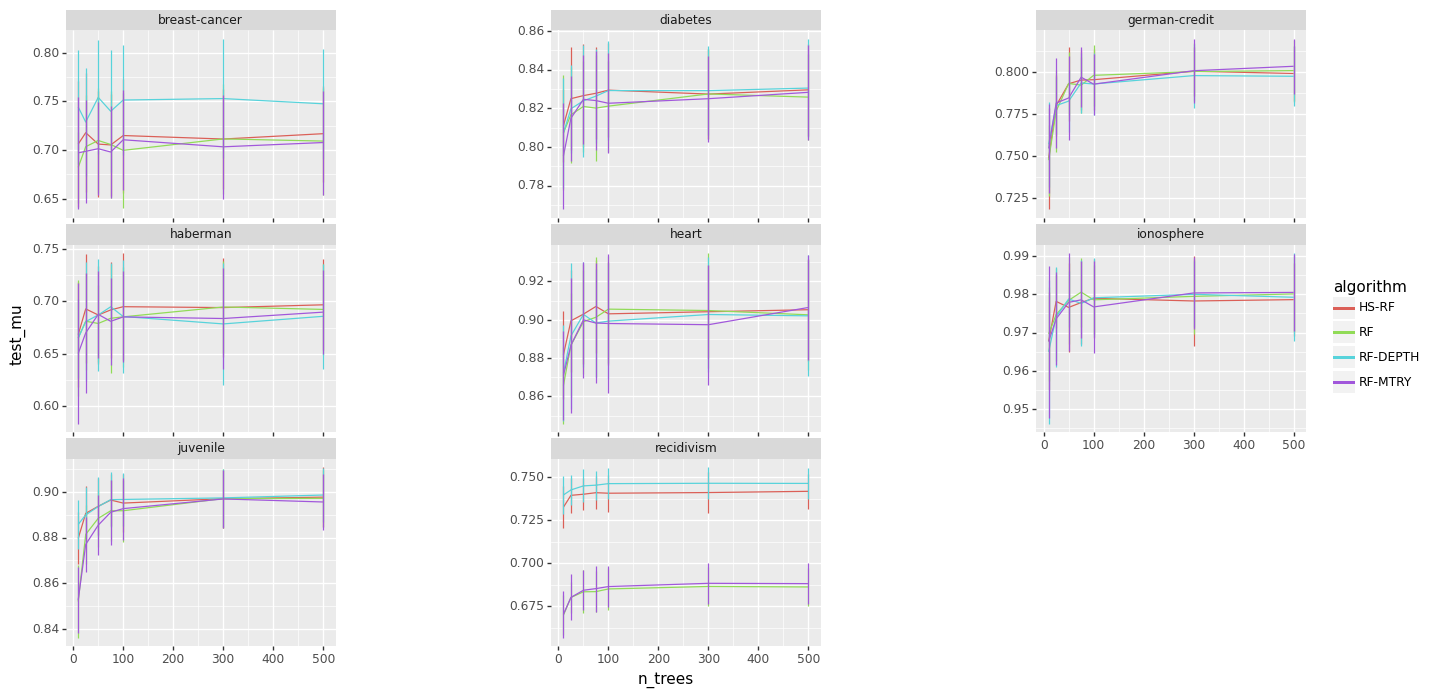

<ggplot: (8784348553111)>

In [4]:
def plot_fig_4D(res):
    res = res.copy()
    res_group = res.drop(["regularization", "boot_iter", "train_wall_time", "test_wall_time", "train_cpu_time", "test_cpu_time", "tunning_wall_time", "tunning_cpu_time"], axis = 1).groupby(["task", "dataset", "algorithm", "scoring", "n_trees"])
    res_mu = res_group.mean()
    
    res_mu.columns = ["train_mu", "test_mu"]
    res_std = res_group.std()
    res_std.columns = ["train_std", "test_std"]
    res = res_mu.join(res_std)
    res["test_min"] = res["test_mu"] - res["test_std"]
    res["test_max"] = res["test_mu"] + res["test_std"]
    res["train_min"] = res["train_mu"] - res["train_std"]
    res["train_max"] = res["train_mu"] + res["train_std"]
    res = res.reset_index()

    g = (ggplot(res, aes(x="n_trees", y="test_mu", color="algorithm")) + 
    geom_line() +
    geom_errorbar(aes(ymin="test_min", ymax="test_max"), width=.2,
                 position=position_dodge(0.05)) +
    facet_wrap("dataset", scales="free") +
    theme(subplots_adjust={'wspace':0.8}) +
    theme(figure_size=(16, 8), legend_position = None)
    )

    display(g)

plot_fig_4D(rf)

In [5]:
# save HS improvement to do some bayesian analysis
dataset_order = ["heart", "breast-cancer", "haberman", "ionosphere", "diabetes", "german-credit", "juvenile", "recidivism"]
rf_improvement = rf.loc[(rf.algorithm == "HS (CART)")][["dataset", "test_score", "n_trees"]]
rf_improvement["dt_score"] = np.array(rf.loc[(rf.algorithm == "DT")]["test_score"])


In [6]:
dataset_order = ["heart", "breast-cancer", "haberman", "ionosphere", "diabetes", "german-credit", "juvenile", "recidivism"]
rf_improvement = rf[["dataset", "algorithm", "test_score", "n_trees"]]

# likelihood hs better than mtry 
rf_disp = rf_improvement.loc[(rf_improvement.algorithm == "RF")]
rf_disp["mtry"] = np.array(rf_improvement.loc[(rf_improvement.algorithm == "RF-MTRY")]["test_score"])
rf_disp["depth"] = np.array(rf_improvement.loc[(rf_improvement.algorithm == "RF-DEPTH")]["test_score"])
rf_disp["hs"] = np.array(rf_improvement.loc[(rf_improvement.algorithm == "HS-RF")]["test_score"])
rf_disp["rf"] = rf_disp["test_score"]
rf_disp = rf_disp.drop(["test_score"], axis = 1)
rf_disp["max"] = np.array(rf_disp[["mtry"]].max(axis = 1))

rf_disp["diff"] = np.abs(rf_disp["hs"] - rf_disp["max"])
rf_disp["better"] = (rf_disp["hs"] > rf_disp["max"]) & (rf_disp["diff"] > 0.005)
rf_disp["same"] = (rf_disp["diff"] < 0.005)
rf_disp["worse"] = (rf_disp["hs"] < rf_disp["max"]) & (rf_disp["diff"] > 0.005)
rf_disp["imp"] = 0
rf_disp.loc[rf_disp.better, "imp"] = 1
rf_disp.loc[rf_disp.same, "imp"] = 2
rf_disp.loc[rf_disp.worse, "imp"] = 3
rf_disp["dataset"] = rf_disp["dataset"].replace(dataset_order, list(range(8)))
rf_disp[["dataset", "imp"]].to_csv("modelling/data/any-mtry-classification.csv", index = False)

# likelihood hs better than depth 
rf_disp = rf_improvement.loc[(rf_improvement.algorithm == "RF")]
rf_disp["mtry"] = np.array(rf_improvement.loc[(rf_improvement.algorithm == "RF-MTRY")]["test_score"])
rf_disp["depth"] = np.array(rf_improvement.loc[(rf_improvement.algorithm == "RF-DEPTH")]["test_score"])
rf_disp["hs"] = np.array(rf_improvement.loc[(rf_improvement.algorithm == "HS-RF")]["test_score"])
rf_disp["rf"] = rf_disp["test_score"]
rf_disp = rf_disp.drop(["test_score"], axis = 1)
rf_disp["max"] = np.array(rf_disp[["depth"]].max(axis = 1))

rf_disp["diff"] = np.abs(rf_disp["hs"] - rf_disp["max"])
rf_disp["better"] = (rf_disp["hs"] > rf_disp["max"]) & (rf_disp["diff"] > 0.005)
rf_disp["same"] = (rf_disp["diff"] < 0.005)
rf_disp["worse"] = (rf_disp["hs"] < rf_disp["max"]) & (rf_disp["diff"] > 0.005)
rf_disp["imp"] = 0
rf_disp.loc[rf_disp.better, "imp"] = 1
rf_disp.loc[rf_disp.same, "imp"] = 2
rf_disp.loc[rf_disp.worse, "imp"] = 3
rf_disp["dataset"] = rf_disp["dataset"].replace(dataset_order, list(range(8)))
rf_disp[["dataset", "imp"]].to_csv("modelling/data/any-depth-classification.csv", index = False)

# likelihood hs better than rf
rf_disp = rf_improvement.loc[(rf_improvement.algorithm == "RF")]
rf_disp["mtry"] = np.array(rf_improvement.loc[(rf_improvement.algorithm == "RF-MTRY")]["test_score"])
rf_disp["depth"] = np.array(rf_improvement.loc[(rf_improvement.algorithm == "RF-DEPTH")]["test_score"])
rf_disp["hs"] = np.array(rf_improvement.loc[(rf_improvement.algorithm == "HS-RF")]["test_score"])
rf_disp["rf"] = rf_disp["test_score"]
rf_disp = rf_disp.drop(["test_score"], axis = 1)
rf_disp["max"] = np.array(rf_disp[["rf"]].max(axis = 1))

rf_disp["diff"] = np.abs(rf_disp["hs"] - rf_disp["max"])
rf_disp["better"] = (rf_disp["hs"] > rf_disp["max"]) & (rf_disp["diff"] > 0.005)
rf_disp["same"] = (rf_disp["diff"] < 0.005)
rf_disp["worse"] = (rf_disp["hs"] < rf_disp["max"]) & (rf_disp["diff"] > 0.005)
rf_disp["imp"] = 0
rf_disp.loc[rf_disp.better, "imp"] = 1
rf_disp.loc[rf_disp.same, "imp"] = 2
rf_disp.loc[rf_disp.worse, "imp"] = 3
rf_disp["dataset"] = rf_disp["dataset"].replace(dataset_order, list(range(8)))
rf_disp[["dataset", "imp"]].to_csv("modelling/data/any-rf-classification.csv", index = False)

/tmp/ipykernel_16799/898965311.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_16799/898965311.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_16799/898965311.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_16799/8989

In [8]:
tree_improvement = rf.loc[(rf.algorithm == "HS-RF")][["dataset", "test_score", "n_trees"]]
tree_improvement["dt"] = np.array(rf.loc[(rf.algorithm == "RF")]["test_score"])
tree_improvement["hs"] = tree_improvement["test_score"]
tree_improvement = tree_improvement.drop(["test_score"], axis = 1)

for dataset in np.unique(rf["dataset"]):
    for n_trees in np.unique(rf["n_trees"]):
        group_improvement = tree_improvement.loc[(tree_improvement.dataset == dataset) & (tree_improvement.n_trees == n_trees)]
        tree_improvement.loc[(tree_improvement.dataset == dataset) & (tree_improvement.n_trees == n_trees), "hs"] = np.random.choice(np.array(group_improvement["hs"]), len(group_improvement["hs"]))
        tree_improvement.loc[(tree_improvement.dataset == dataset) & (tree_improvement.n_trees == n_trees), "dt"] = np.random.choice(np.array(group_improvement["dt"]), len(group_improvement["dt"]))
        
tree_improvement["diff"] = np.abs(tree_improvement["hs"] - tree_improvement["dt"])
tree_improvement["better"] = (tree_improvement["hs"] > tree_improvement["dt"]) & (tree_improvement["diff"] > 0.005)
tree_improvement["same"] = (tree_improvement["diff"] < 0.005)
tree_improvement["worse"] = (tree_improvement["hs"] < tree_improvement["dt"]) & (tree_improvement["diff"] > 0.005)
tree_improvement["imp"] = 0
tree_improvement.loc[tree_improvement.better, "imp"] = 1
tree_improvement.loc[tree_improvement.same, "imp"] = 2
tree_improvement.loc[tree_improvement.worse, "imp"] = 3
tree_improvement["dataset"] = tree_improvement["dataset"].replace(dataset_order, list(range(8)))
tree_improvement[["dataset", "imp"]].to_csv("modelling/data/random-rf.csv", index = False)

In [9]:
tree_improvement = rf.loc[(rf.algorithm == "HS-RF")][["dataset", "test_score", "n_trees"]]
tree_improvement["dt"] = np.array(rf.loc[(rf.algorithm == "RF")]["test_score"])
tree_improvement["hs"] = tree_improvement["test_score"]
tree_improvement = tree_improvement.drop(["test_score"], axis = 1)

for dataset in np.unique(rf["dataset"]):
    for n_trees in np.unique(rf["n_trees"]):
        group_improvement = tree_improvement.loc[(tree_improvement.dataset == dataset) & (tree_improvement.n_trees == n_trees)]
        tree_improvement.loc[(tree_improvement.dataset == dataset) & (tree_improvement.n_trees == n_trees), "hs"] = np.random.choice(np.array(group_improvement["hs"]), len(group_improvement["hs"]))
        tree_improvement.loc[(tree_improvement.dataset == dataset) & (tree_improvement.n_trees == n_trees), "dt"] = np.random.choice(np.array(group_improvement["dt"]), len(group_improvement["dt"]))
        
tree_improvement["diff"] = np.abs(tree_improvement["hs"] - tree_improvement["dt"])
tree_improvement["better"] = (tree_improvement["hs"] > tree_improvement["dt"]) & (tree_improvement["diff"] > 0.005)
tree_improvement["same"] = (tree_improvement["diff"] < 0.005)
tree_improvement["worse"] = (tree_improvement["hs"] < tree_improvement["dt"]) & (tree_improvement["diff"] > 0.005)
tree_improvement["imp"] = 0
tree_improvement.loc[tree_improvement.better, "imp"] = 1
tree_improvement.loc[tree_improvement.same, "imp"] = 2
tree_improvement.loc[tree_improvement.worse, "imp"] = 3
tree_improvement["dataset"] = tree_improvement["dataset"].replace(dataset_order, list(range(8)))
tree_improvement[["dataset", "imp"]].to_csv("modelling/data/random-rf.csv", index = False)

,dataset,n_trees,dt,hs,diff,better,same,worse,imp
3,0,10,0.875750,0.899500,0.023750,True,False,False,1
7,0,25,0.924250,0.919500,0.004750,False,True,False,2
11,0,50,0.892500,0.887500,0.005000,False,False,True,3
15,0,75,0.917500,0.891000,0.026500,False,False,True,3
19,0,100,0.927750,0.905500,0.022250,False,False,True,3
...,...,...,...,...,...,...,...,...,...
2223,7,50,0.698855,0.737093,0.038238,True,False,False,1
2227,7,75,0.654889,0.732717,0.077829,True,False,False,1
2231,7,100,0.699140,0.746595,0.047455,True,False,False,1
2235,7,300,0.679295,0.730263,0.050968,True,False,False,1


In [38]:
tree_improvement = rf.loc[(rf.algorithm == "HS-RF")][["dataset", "test_score", "n_trees"]]
tree_improvement["mtry"] = np.array(rf.loc[(rf.algorithm == "RF-MTRY")]["test_score"])
tree_improvement["dmax"] = np.array(rf.loc[(rf.algorithm == "RF-DEPTH")]["test_score"])
tree_improvement["hs"] = tree_improvement["test_score"]
tree_improvement = tree_improvement.drop(["test_score"], axis = 1)

for dataset in np.unique(rf["dataset"]):
    for n_trees in np.unique(rf["n_trees"]):
        group_improvement = tree_improvement.loc[(tree_improvement.dataset == dataset) & (tree_improvement.n_trees == n_trees)]
        tree_improvement.loc[(tree_improvement.dataset == dataset) & (tree_improvement.n_trees == n_trees), "hs"] = np.random.choice(np.array(group_improvement["hs"]), len(group_improvement["hs"]))
        tree_improvement.loc[(tree_improvement.dataset == dataset) & (tree_improvement.n_trees == n_trees), "mtry"] = np.random.choice(np.array(group_improvement["mtry"]), len(group_improvement["mtry"]))
        tree_improvement.loc[(tree_improvement.dataset == dataset) & (tree_improvement.n_trees == n_trees), "dmax"] = np.random.choice(np.array(group_improvement["dmax"]), len(group_improvement["dmax"]))

max_score = tree_improvement[["hs", "dmax", "mtry"]].max(axis = 1)

hs_best = np.array(tree_improvement["hs"] >= max_score - 0.005)
dmax_best = np.array(tree_improvement["dmax"] >= max_score - 0.005)
mtry_best = np.array(tree_improvement["mtry"] >= max_score - 0.005)

tree_improvement["imp"] = 1

hs_df_best = tree_improvement.copy()
hs_df_best.loc[hs_best, "imp"] = 2
hs_df_best["dataset"] = hs_df_best["dataset"].replace(dataset_order, list(range(8)))
hs_df_best[["dataset", "imp"]].to_csv("modelling/data/reg-hsrf.csv", index = False)

dmax_df_best = tree_improvement.copy()
dmax_df_best.loc[dmax_best, "imp"] = 2
dmax_df_best["dataset"] = dmax_df_best["dataset"].replace(dataset_order, list(range(8)))
dmax_df_best[["dataset", "imp"]].to_csv("modelling/data/reg-dmax.csv", index = False)

mtry_df_best = tree_improvement.copy()
mtry_df_best.loc[hs_best, "imp"] = 2
mtry_df_best["dataset"] = mtry_df_best["dataset"].replace(dataset_order, list(range(8)))
mtry_df_best[["dataset", "imp"]].to_csv("modelling/data/reg-mtry.csv", index = False)